In [57]:
#Import necessary libraries: pandas, numpy, matplotlib, seaborn
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [58]:
#Load the CSV file into a DataFrame and check its shape
df = pd.read_csv('Diwali Sales Data.csv',encoding = 'latin1')
df.shape

(11251, 15)

In [59]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11251 entries, 0 to 11250
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   User_ID           11251 non-null  int64  
 1   Cust_name         11251 non-null  object 
 2   Product_ID        11251 non-null  object 
 3   Gender            11251 non-null  object 
 4   Age Group         11251 non-null  object 
 5   Age               11251 non-null  int64  
 6   Marital_Status    11251 non-null  int64  
 7   State             11250 non-null  object 
 8   Zone              11251 non-null  object 
 9   Occupation        11251 non-null  object 
 10  Product_Category  11249 non-null  object 
 11  Orders            11251 non-null  int64  
 12  Amount            11239 non-null  float64
 13  Status            0 non-null      float64
 14  unnamed1          0 non-null      float64
dtypes: float64(3), int64(4), object(8)
memory usage: 1.3+ MB


In [60]:
#Drop unnecessary columns 'Status' and 'unnamed1'
df.drop(['Status','unnamed1'],axis = 1,inplace = True)

In [61]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11251 entries, 0 to 11250
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   User_ID           11251 non-null  int64  
 1   Cust_name         11251 non-null  object 
 2   Product_ID        11251 non-null  object 
 3   Gender            11251 non-null  object 
 4   Age Group         11251 non-null  object 
 5   Age               11251 non-null  int64  
 6   Marital_Status    11251 non-null  int64  
 7   State             11250 non-null  object 
 8   Zone              11251 non-null  object 
 9   Occupation        11251 non-null  object 
 10  Product_Category  11249 non-null  object 
 11  Orders            11251 non-null  int64  
 12  Amount            11239 non-null  float64
dtypes: float64(1), int64(4), object(8)
memory usage: 1.1+ MB


In [62]:
#Check for missing values in the DataFrame
pd.isnull(df).sum()

User_ID              0
Cust_name            0
Product_ID           0
Gender               0
Age Group            0
Age                  0
Marital_Status       0
State                1
Zone                 0
Occupation           0
Product_Category     2
Orders               0
Amount              12
dtype: int64

In [63]:
#rop rows with missing values
df.dropna(inplace = True)

In [64]:
#Check shape after dropping missing values
df.shape

(11236, 13)

In [65]:
#Convert 'Amount' column to integer type
df['Amount'] = df['Amount'].astype(int)

In [66]:
df['Amount'].dtype

dtype('int64')

In [67]:
df.columns

Index(['User_ID', 'Cust_name', 'Product_ID', 'Gender', 'Age Group', 'Age',
       'Marital_Status', 'State', 'Zone', 'Occupation', 'Product_Category',
       'Orders', 'Amount'],
      dtype='object')

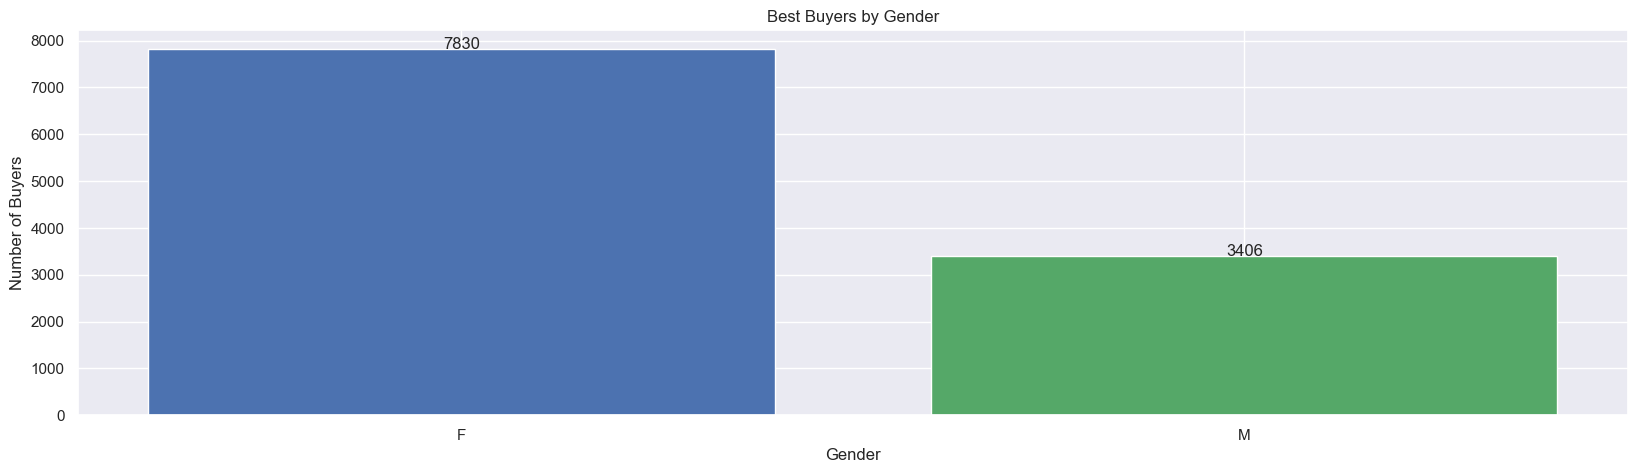

In [68]:
#Count plot of Gender

gender_count = df['Gender'].value_counts()

plt.bar(gender_count.index,gender_count.values,color = ['b','g'])
plt.title('Best Buyers by Gender')
plt.xlabel('Gender')
plt.ylabel('Number of Buyers')

# Add value labels on top of each bar
for i, val in enumerate(gender_count.values): # i = bar index, val = bar height
    plt.text(i, val + 0.5, str(val), ha='center', fontsize=12) # add value text above each bar
    
plt.show()

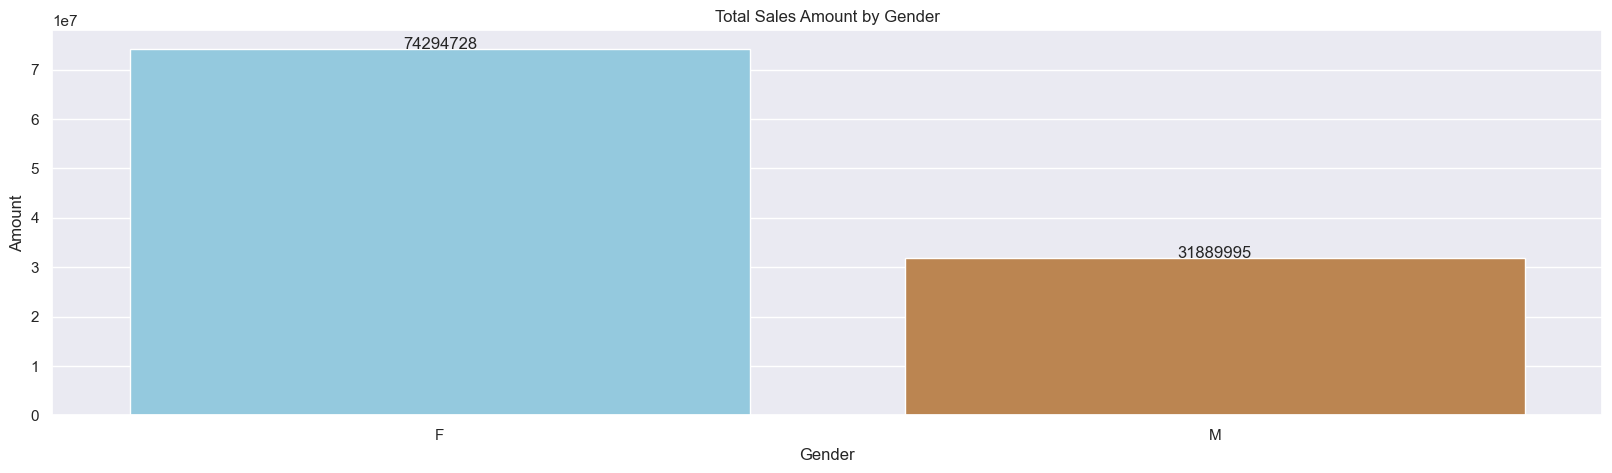

In [69]:
#Total sales amount by Gender

sales_gen = df.groupby(['Gender'], as_index = False)['Amount'].sum().sort_values(by = 'Amount',ascending = False)

ax = sns.barplot(x='Gender', y='Amount', hue='Gender', data=sales_gen, 
                 palette=['skyblue', 'peru'], legend=False)

# Add value labels on top of bars
for i, v in enumerate(sales_gen['Amount']):  # i = bar index, v = bar height (Amount)
    ax.text(i, v + 0.5, str(int(v)), ha='center', fontsize=12) # add value text above each bar

plt.title("Total Sales Amount by Gender")

plt.show()

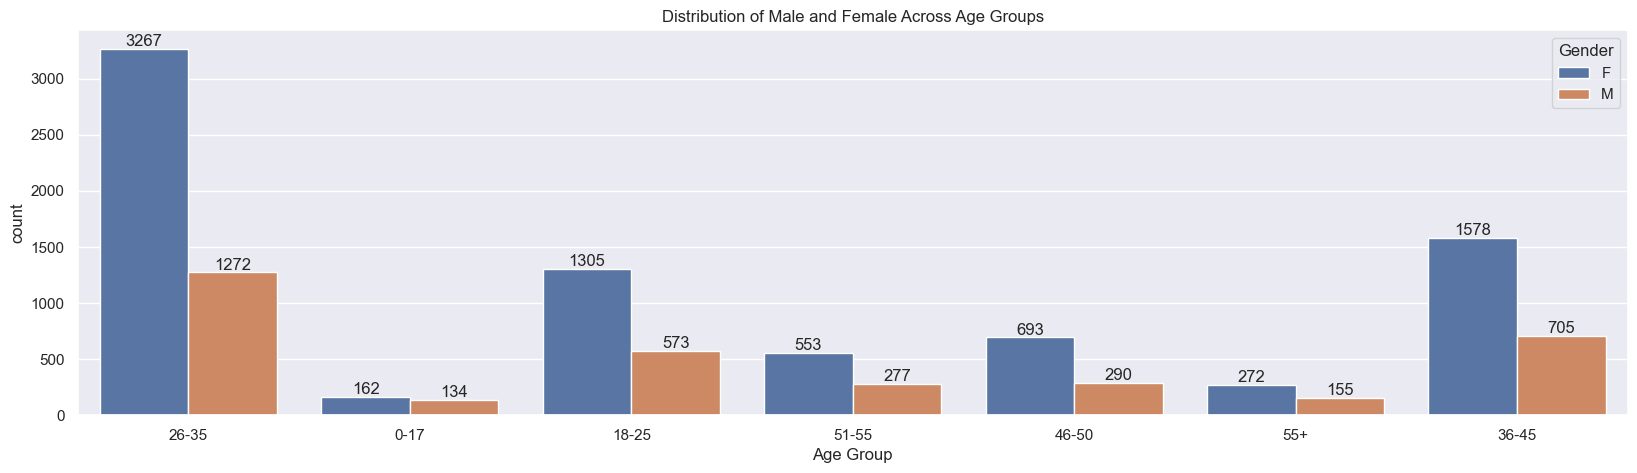

In [70]:
#Distribution of male and female across Age Groups

ax = sns.countplot(x = 'Age Group', data = df,hue = "Gender")

# Add bar labels
for bars in ax.containers:
    ax.bar_label(bars)

plt.title("Distribution of Male and Female Across Age Groups") 

plt.show()

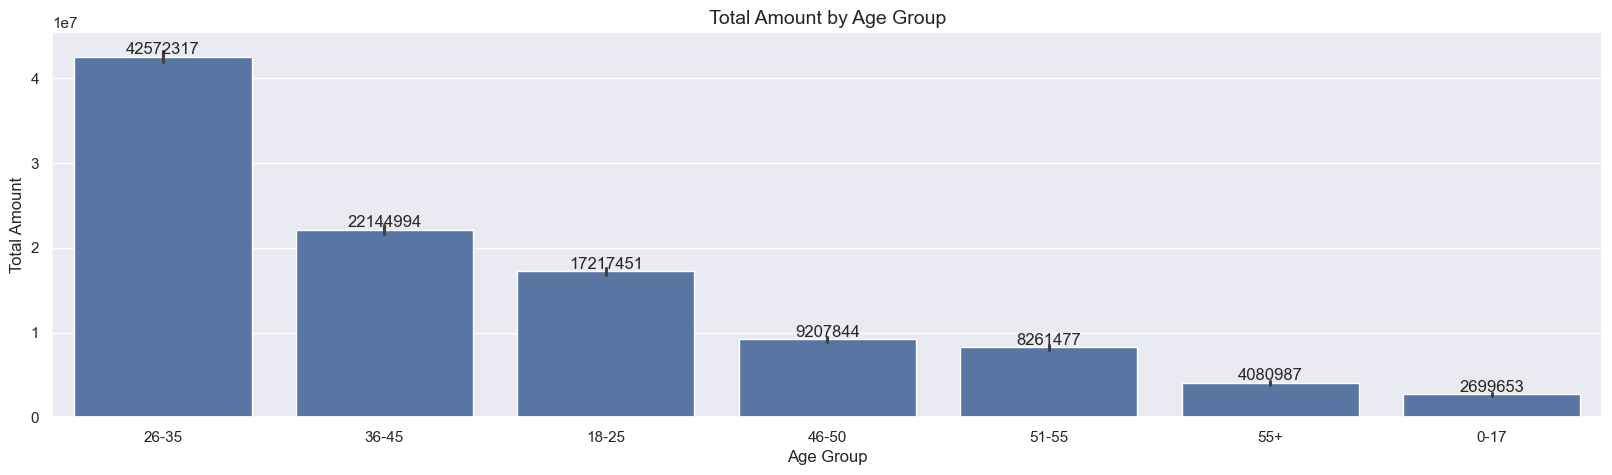

In [71]:
#Total Amount by Age Group

order = df.groupby('Age Group')['Amount'].sum().sort_values(ascending=False).index

order = df.groupby('Age Group')['Amount'].sum().sort_values(ascending=False).index

ax = sns.barplot(x='Age Group', y='Amount', data=df, estimator=sum, order=order)

#Annotate total amount on top of each bar
for p in ax.patches:
    ax.annotate(format(p.get_height(), '.0f'),                     # show bar height as integer 
                (p.get_x() + p.get_width() / 2., p.get_height()),  # position at top center of bar
                ha = 'center', va = 'center',                      # align text center
                xytext = (0, 5),                                   # shift text 5 units above
                textcoords = 'offset points')                      # use offset for placement

plt.title("Total Amount by Age Group", fontsize=14)
plt.xlabel("Age Group")
plt.ylabel("Total Amount")
plt.show()

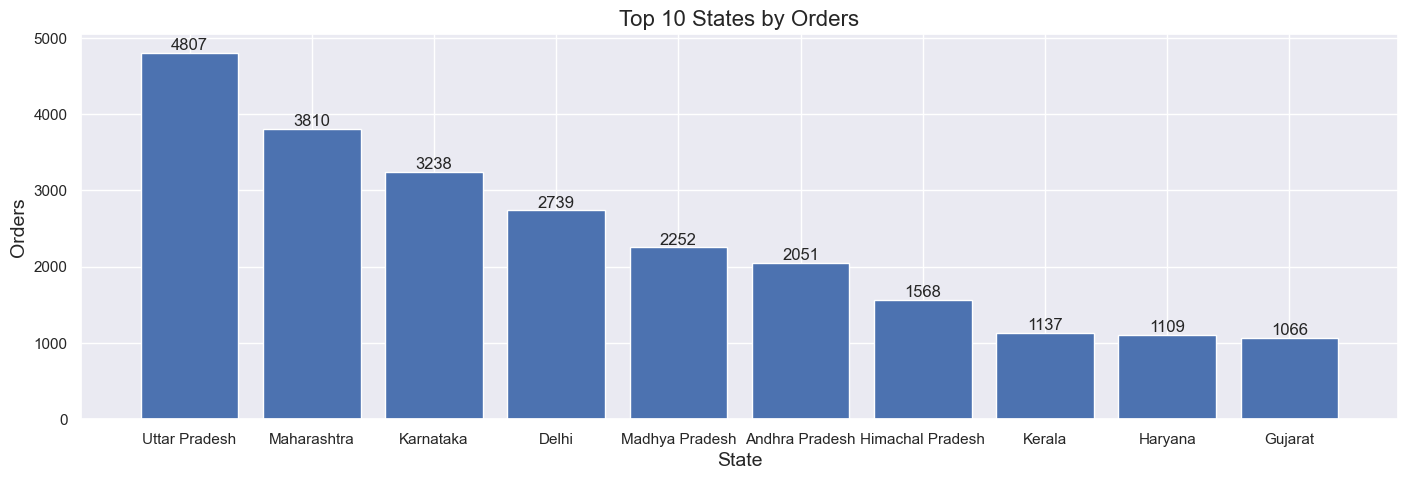

In [72]:
#Top 10 States by Orders

sales_state = df.groupby('State')['Orders'].sum().sort_values(ascending=False).head(10)

plt.figure(figsize=(17, 5))
bars = plt.bar(sales_state.index, sales_state.values)

# Labels
plt.xlabel("State", fontsize=14)
plt.ylabel("Orders", fontsize=14)
plt.title("Top 10 States by Orders", fontsize=16)

# Add value labels on top of bars
for bar in bars:
    height = bar.get_height()
    plt.text(
        bar.get_x() + bar.get_width()/2,  # X position (middle of bar)
        height,                          # Y position (top of bar)
        f'{height}',                     # Label text
        ha='center', va='bottom', fontsize=12
    )

plt.show()


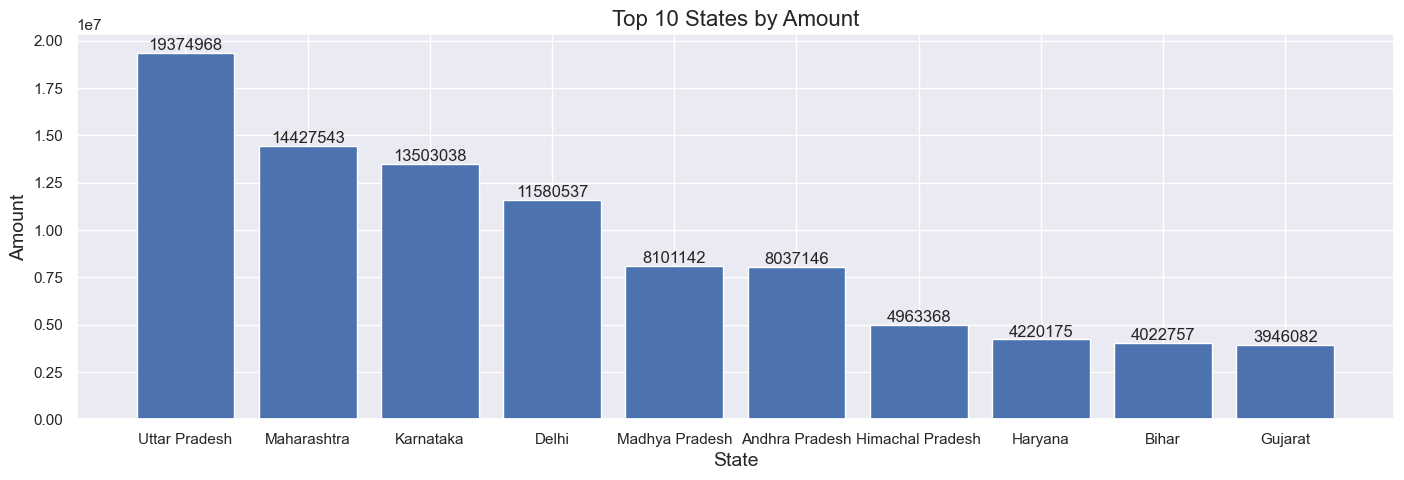

In [73]:
#Top 10 States by Amount

sales_state = df.groupby('State')['Amount'].sum().sort_values(ascending=False).head(10)



plt.figure(figsize=(17, 5))
bars = plt.bar(sales_state.index, sales_state.values)

# Labels
plt.xlabel("State", fontsize=14)
plt.ylabel("Amount", fontsize=14)
plt.title("Top 10 States by Amount", fontsize=16)

# Add value labels on top of bars
for bar in bars:
    height = bar.get_height()
    plt.text(
        bar.get_x() + bar.get_width()/2,  # X position (middle of bar)
        height,                          # Y position (top of bar)
        f'{height}',                     # Label text
        ha='center', va='bottom', fontsize=12
    )

plt.show()

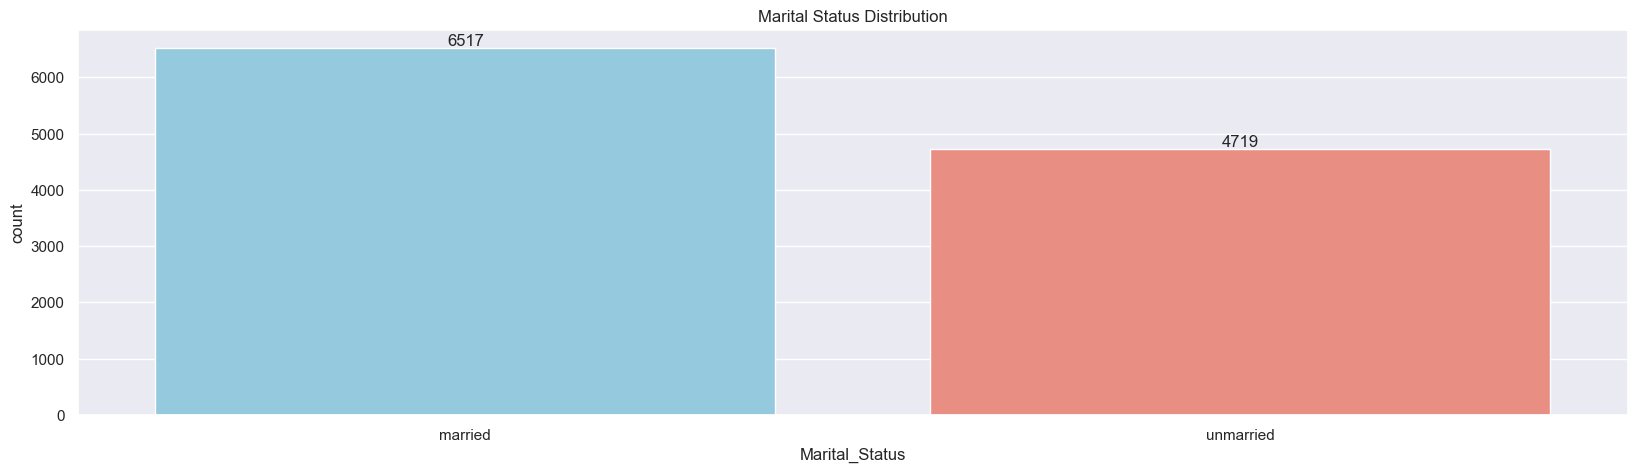

In [74]:
#Count plot of Marital Status

ax = sns.countplot (data = df, x = 'Marital_Status',hue = 'Marital_Status',palette=['skyblue', 'salmon'],legend = False)
sns.set(rc = { 'figure.figsize': (4,5)})

# Add bar labels
for bars in ax.containers:
    ax.bar_label(bars)
    
ax.set_title('Marital Status Distribution')
plt.xticks([0, 1], ['married', 'unmarried'])
plt.show()

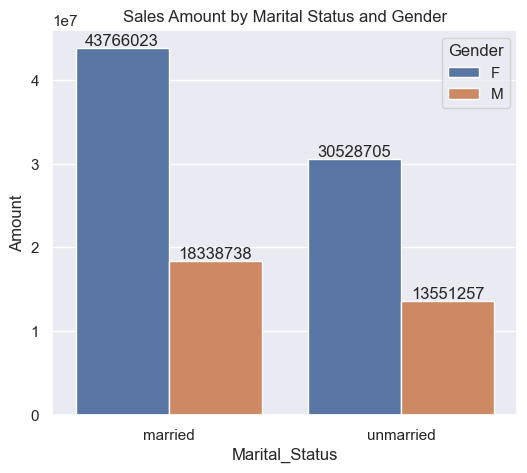

In [75]:
#Sales Amount by Marital Status and Gender

sales_state = df.groupby (['Marital_Status', 'Gender'], as_index=False) ['Amount'].sum().sort_values(by='Amount', ascending=False)

sns.set(rc={'figure.figsize': (6,5)})
ax = sns.barplot(data = sales_state, x = 'Marital_Status', y ='Amount', hue = 'Gender')

for bars in ax.containers:
    ax.bar_label(bars, fmt='%.0f', fontsize=12)
    
plt.title('Sales Amount by Marital Status and Gender')
plt.xticks([0,1],['married', 'unmarried'])
plt.show()

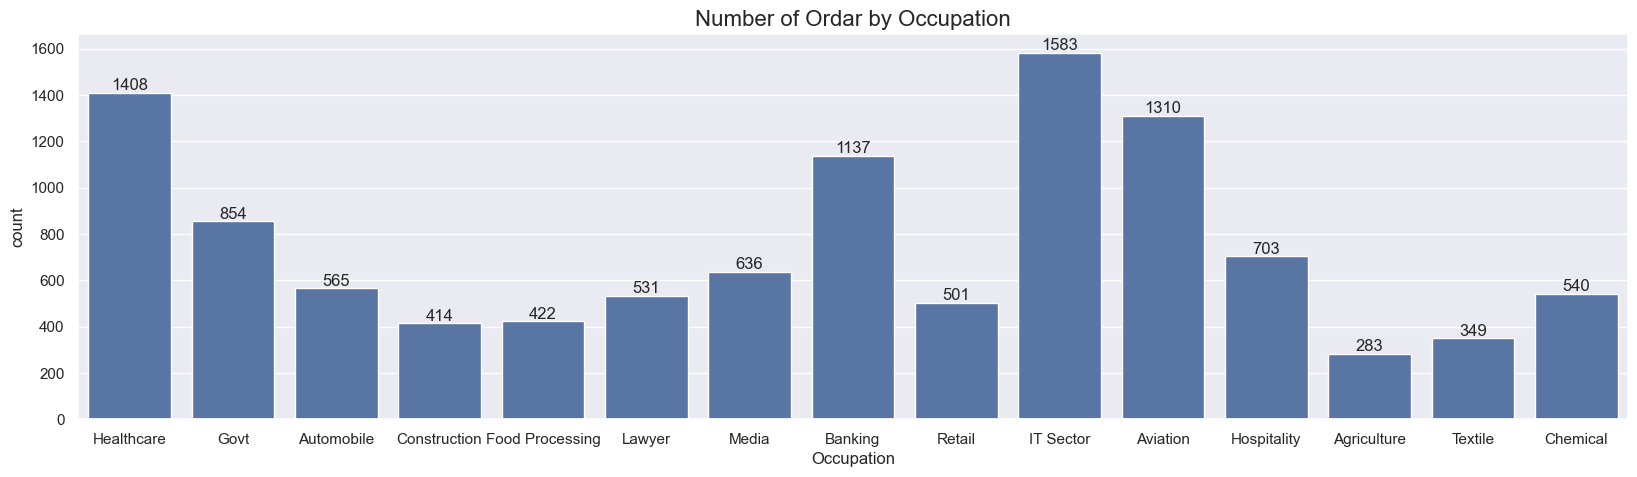

In [76]:
#Number of Orders by Occupation

sns.set(rc = {'figure.figsize':(20,5)})

ax = sns.countplot (data = df, x = 'Occupation')

for bars in ax.containers:
    ax.bar_label(bars)

ax.set_title('Number of Ordar by Occupation', fontsize=16)
plt.show()

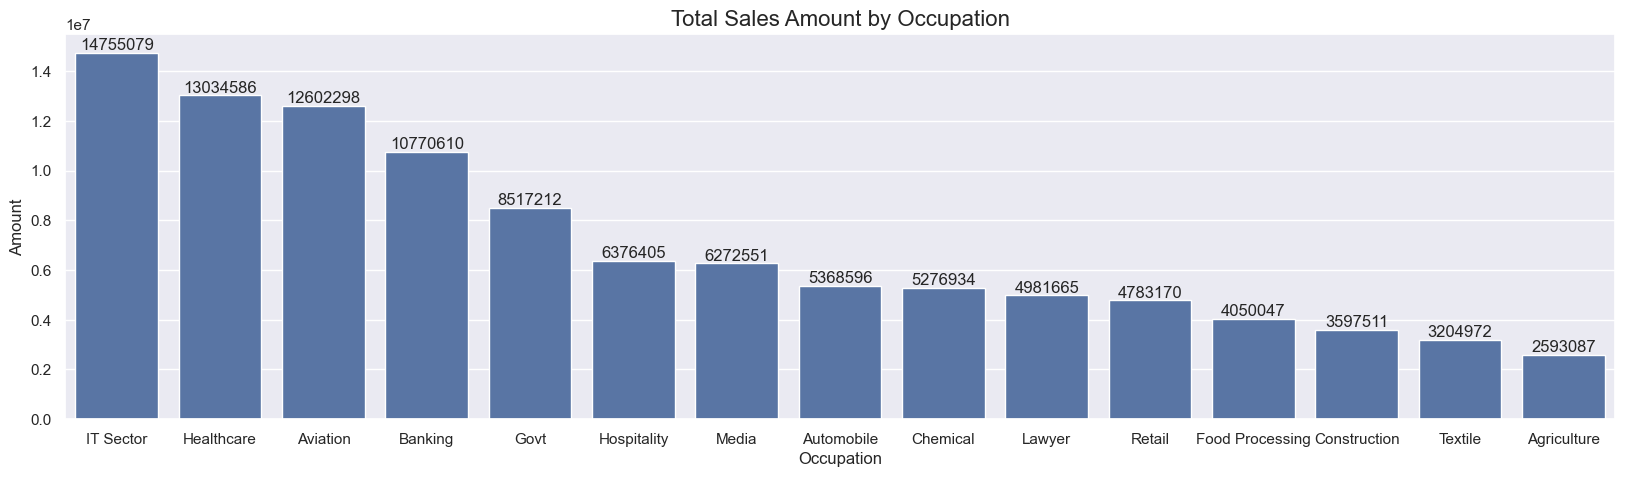

In [77]:
#Total Sales Amount by Occupation

sales_state = df.groupby(['Occupation'], as_index=False)['Amount'].sum().sort_values(by ='Amount',ascending = False)

sns.set(rc={'figure.figsize': (20,5)})

ax = sns.barplot(data = sales_state, x = 'Occupation',y= 'Amount')

for bars in ax.containers:
    ax.bar_label(bars, fmt='%.0f', fontsize=12)  

ax.set_title('Total Sales Amount by Occupation', fontsize=16)

plt.show()

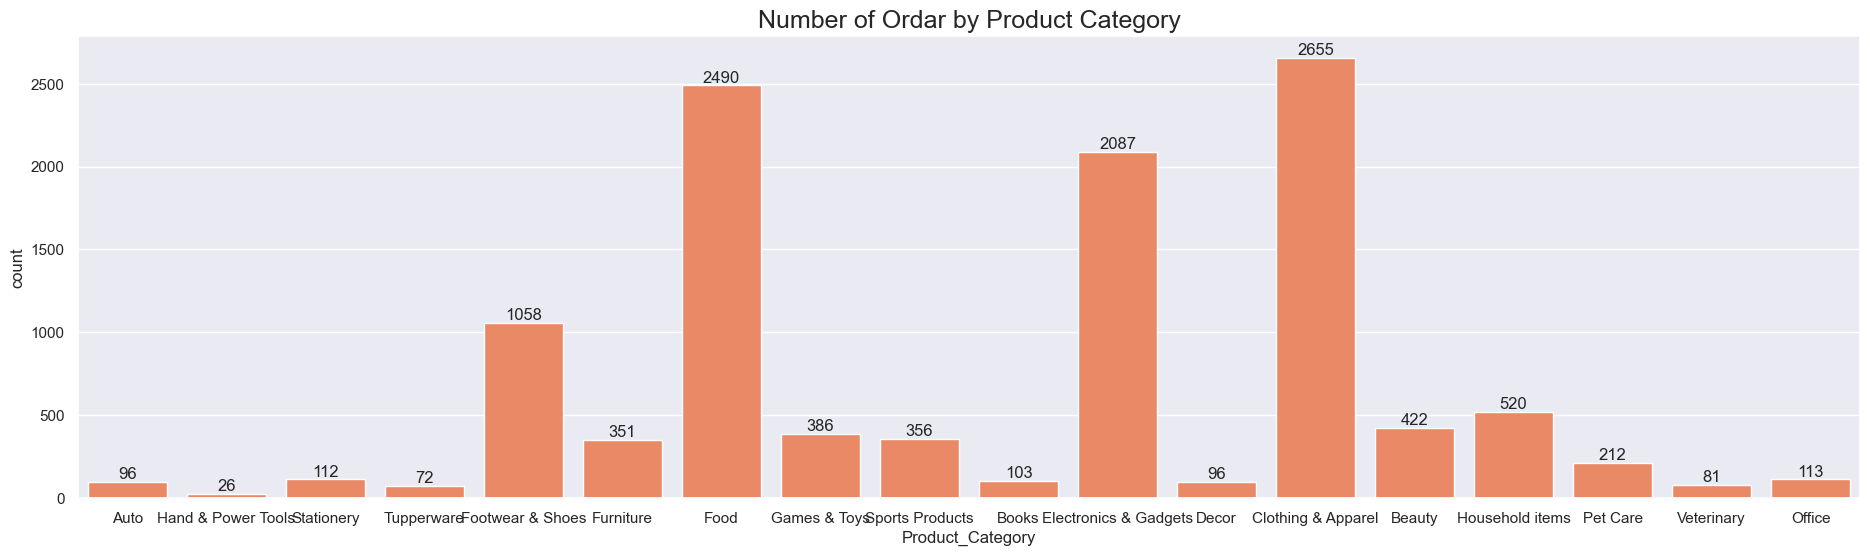

In [78]:
#Number of Orders by Product Category

sns.set(rc={'figure.figsize': (23,6)})

ax = sns.countplot(data = df, x = 'Product_Category',color = 'coral')
                     
for bars in ax.containers:
    ax.bar_label(bars)

ax.set_title('Number of Ordar by Product Category', fontsize=18)

plt.show()

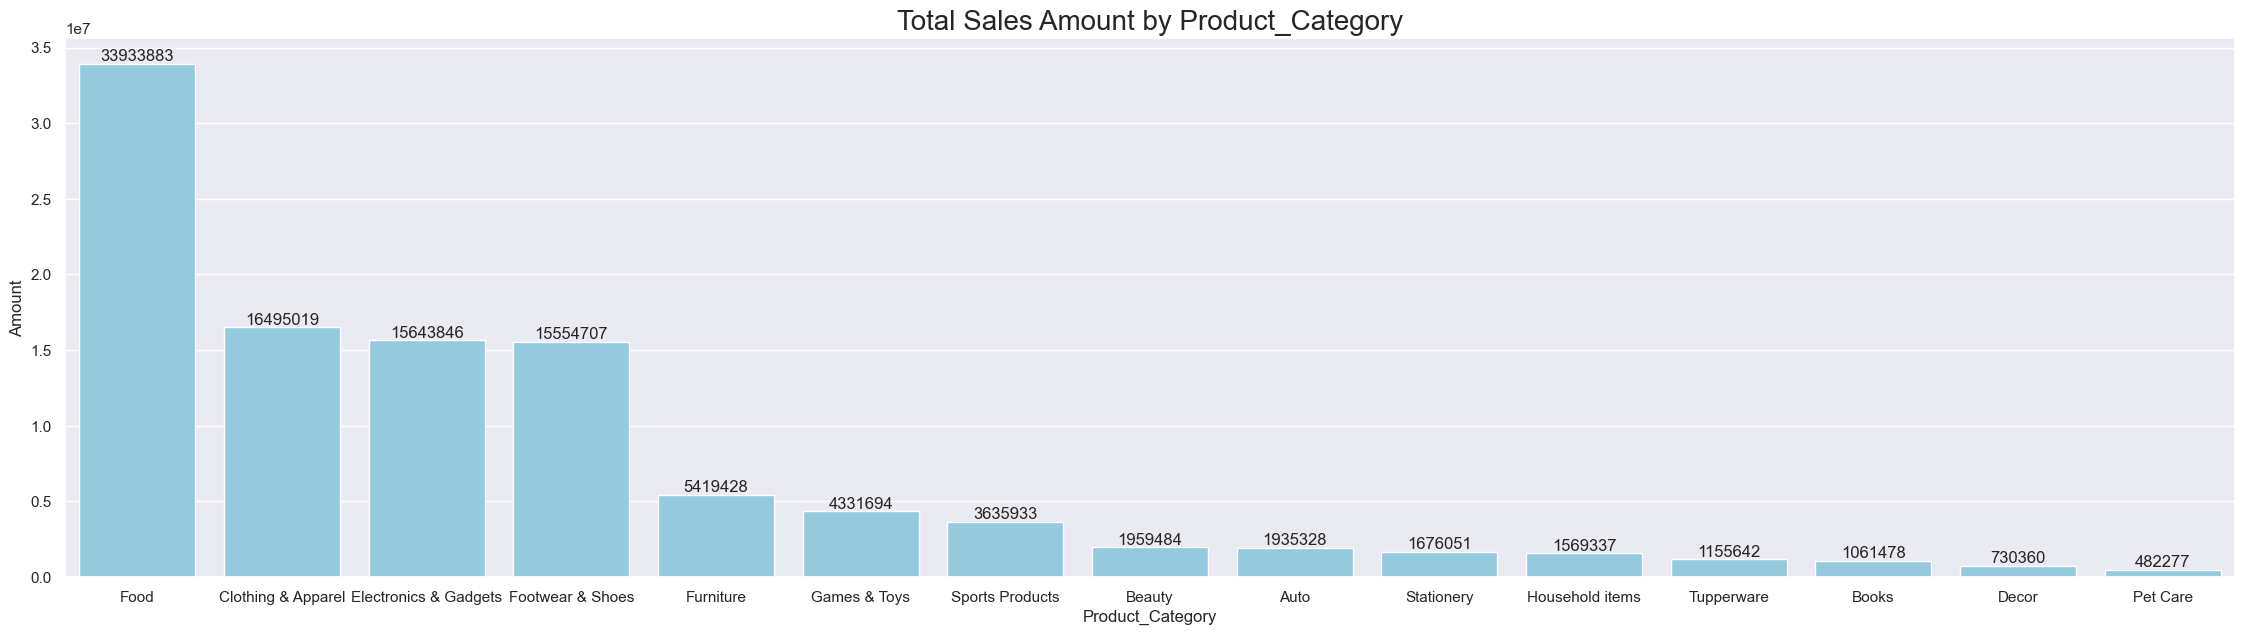

In [79]:
#Total Sales Amount by Product Category (Top 15)

sales_state = df.groupby(['Product_Category'], as_index = False)['Amount'].sum().sort_values(by= 'Amount',ascending = False).head(15)

sns.set(rc={'figure.figsize': (28,7)})

ax = sns.barplot (data = sales_state, x ='Product_Category',y= 'Amount',color= 'skyblue')

for bars in ax.containers:
    ax.bar_label(bars, fmt='%.0f', fontsize=12)

ax.set_title('Total Sales Amount by Product_Category', fontsize=20)
    
plt.show()

In [80]:
df.columns

Index(['User_ID', 'Cust_name', 'Product_ID', 'Gender', 'Age Group', 'Age',
       'Marital_Status', 'State', 'Zone', 'Occupation', 'Product_Category',
       'Orders', 'Amount'],
      dtype='object')

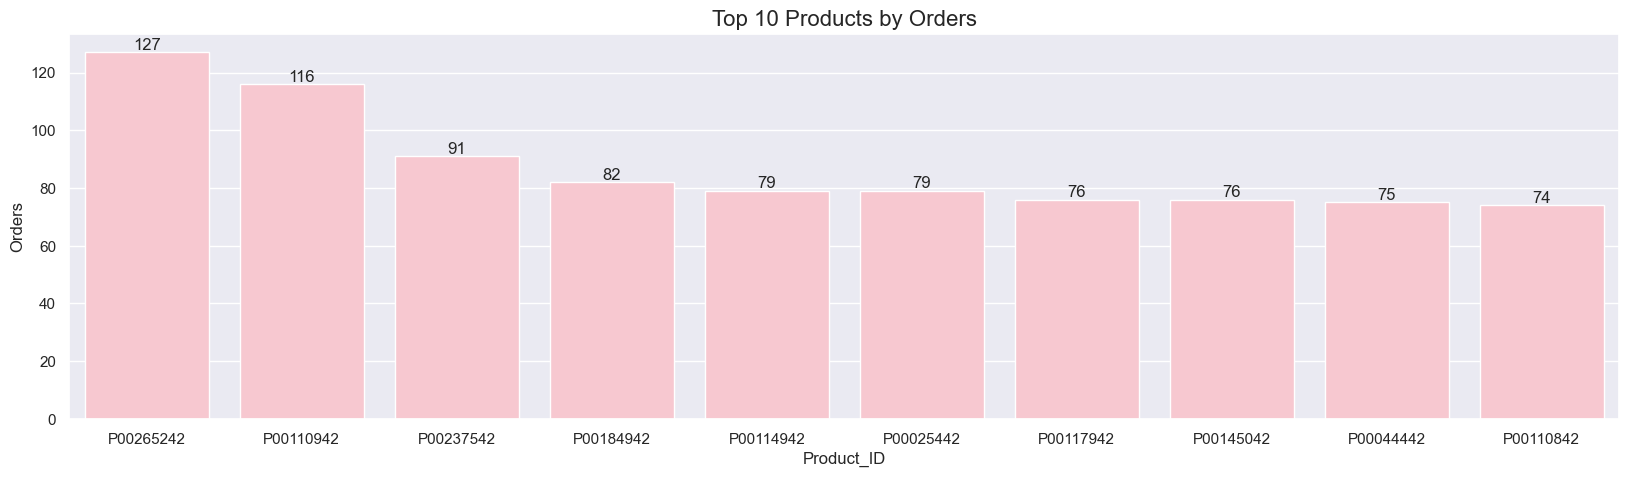

In [81]:
#Top 10 Products by Orders

sales_state =df.groupby(['Product_ID'], as_index=False)['Orders'].sum().sort_values(by='Orders', ascending=False).head(10)

sns.set(rc={'figure.figsize':(20,5)})

ax = sns.barplot(data = sales_state, x = 'Product_ID', y = 'Orders',color = 'pink')
for bars in ax.containers:
    ax.bar_label(bars, fmt='%.0f', fontsize=12)  

ax.set_title('Top 10 Products by Orders', fontsize=16)

plt.show()